In [1]:
# An example notebook inspired by
# - https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# - https://lectures.scientific-python.org/packages/scikit-learn/index.html#basic-principles-of-machine-learning-with-scikit-learn
# - https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier

# use our own custom code
from {{ cookiecutter.project_slug }} import utils

In [3]:
df = pd.read_csv("../data/iris.csv", names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])

In [4]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


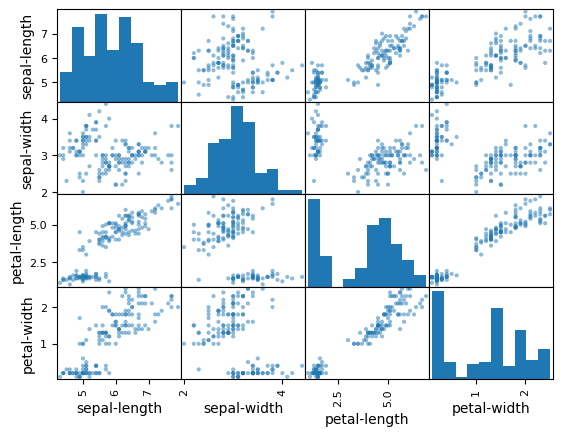

In [5]:
pd.plotting.scatter_matrix(df);

In [6]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

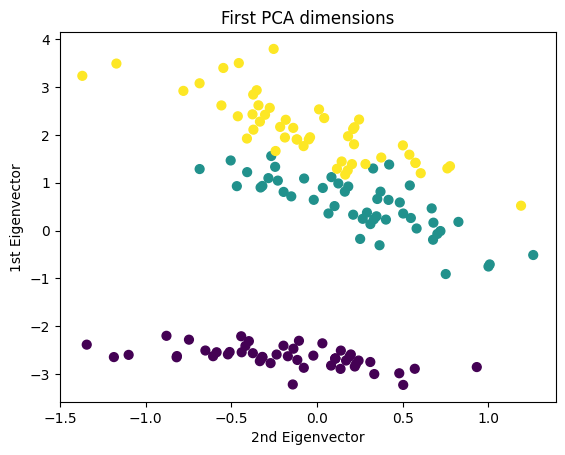

In [7]:
fig, ax = plt.subplots()

X_reduced = PCA(n_components=2).fit_transform(X)
# Rotate the eigenvectors by 90 degrees to show the use of our example function
X_rotated = np.array([utils.so2(90) @ vector for vector in X_reduced])
ax.scatter(
    X_rotated[:, 0],
    X_rotated[:, 1],
    c=df["class"].astype("category").cat.codes,
    s=40
)

ax.set_title("First PCA dimensions")
ax.set_ylabel("1st Eigenvector")
ax.set_xlabel("2nd Eigenvector")
plt.show()

In [8]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ETREE', ExtraTreesClassifier()))
models.append(('GRAD', HistGradientBoostingClassifier()))

In [9]:
# Evaluate models
results = []
names = []
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.951818 (0.048285)
KNN: 0.933636 (0.059620)
CART: 0.923636 (0.055922)
NB: 0.922727 (0.086650)
ETREE: 0.933636 (0.059620)
GRAD: 0.905455 (0.057668)


Text(0.5, 1.0, 'Algorithm Comparison')

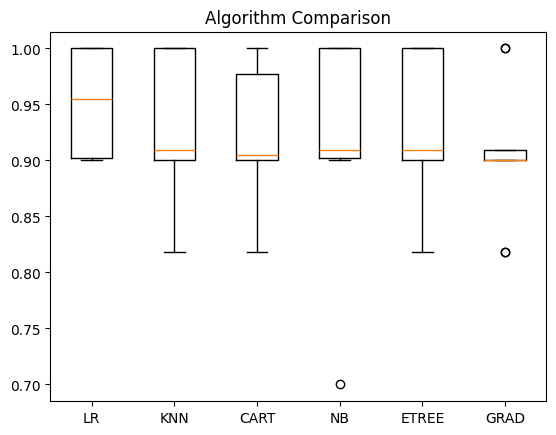

In [10]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')

In [11]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [12]:
print(metrics.classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

